In [5]:
# Import wymaganych bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
import gc

# Ustawienia opcji
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None  # Wyświetlanie wszystkich kolumn
sns.set_style("whitegrid")  # Styl wykresów

# Opcjonalnie, jeśli dane są bardzo duże
gc.collect()


0

In [3]:
from google.colab import files

# Załaduj swój plik .json z API Kaggle (Kaggle account -> API -> Create New API Token)
files.upload()

# Ustaw ścieżkę i pobierz dane
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d <dataset-name>


Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `kaggle datasets download -d <dataset-name>'


In [6]:
import os

path = "/content"
samples = []
for i in range(2):  # Liczba partycji
    file_path = f"{path}/train.parquet/partition_id={i}/part-0.parquet"
    part = pd.read_parquet(file_path)
    samples.append(part)

# Połącz dane w jeden DataFrame
sample_df = pd.concat(samples, ignore_index=True)
print(sample_df.info())  # Informacje o danych
sample_df.round(1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748457 entries, 0 to 4748456
Data columns (total 92 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date_id      int16  
 1   time_id      int16  
 2   symbol_id    int8   
 3   weight       float32
 4   feature_00   float32
 5   feature_01   float32
 6   feature_02   float32
 7   feature_03   float32
 8   feature_04   float32
 9   feature_05   float32
 10  feature_06   float32
 11  feature_07   float32
 12  feature_08   float32
 13  feature_09   int8   
 14  feature_10   int8   
 15  feature_11   int16  
 16  feature_12   float32
 17  feature_13   float32
 18  feature_14   float32
 19  feature_15   float32
 20  feature_16   float32
 21  feature_17   float32
 22  feature_18   float32
 23  feature_19   float32
 24  feature_20   float32
 25  feature_21   float32
 26  feature_22   float32
 27  feature_23   float32
 28  feature_24   float32
 29  feature_25   float32
 30  feature_26   float32
 31  feature_27   float32
 32

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,0,0,1,3.9,NaN,NaN,NaN,NaN,NaN,0.9,0.2,0.3,-0.9,11,7,76,-0.9,0.0,-0.7,NaN,-0.2,NaN,-1.3,-1.7,0.9,NaN,1.6,1.5,-1.6,-0.2,NaN,NaN,1.4,-0.3,0.1,NaN,NaN,NaN,0.3,0.3,0.3,-0.0,-0.2,NaN,-1.1,NaN,NaN,-0.2,NaN,NaN,NaN,0.6,2.1,0.8,NaN,0.2,NaN,NaN,-0.8,NaN,-2.0,0.7,NaN,-1.0,-0.3,-1.4,NaN,NaN,NaN,NaN,NaN,-1.3,-0.1,-0.5,-1.0,0.2,-0.7,NaN,NaN,-0.3,-0.2,-0.3,-0.3,0.7,-0.1,1.4,2.0,0.2,1.2,0.8,0.3,0.1
1,0,0,7,1.4,NaN,NaN,NaN,NaN,NaN,0.7,0.2,0.2,-0.5,11,7,76,-0.9,-0.2,-0.6,NaN,0.3,NaN,-1.3,-1.7,1.4,NaN,0.5,0.7,-0.8,0.6,NaN,NaN,0.2,0.6,1.1,NaN,NaN,NaN,-1.5,-1.4,-1.8,-0.1,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.8,-0.0,-0.6,NaN,1.2,NaN,NaN,-1.6,NaN,-1.4,1.1,NaN,0.9,0.5,-1.4,NaN,NaN,NaN,NaN,NaN,-1.1,0.0,-0.6,-1.1,-0.4,-0.7,NaN,NaN,-0.3,-0.2,-0.2,-0.3,3.0,1.2,-0.5,3.8,2.6,5.0,0.7,0.2,0.8
2,0,0,9,2.3,NaN,NaN,NaN,NaN,NaN,1.1,0.2,0.2,-0.8,11,7,76,-0.7,-0.2,-0.6,NaN,-0.8,NaN,-1.3,-2.0,0.6,NaN,1.6,0.7,-1.4,0.4,NaN,NaN,-0.0,-0.3,-0.1,NaN,NaN,NaN,-0.3,-1.0,-2.4,0.1,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.4,-3.5,-4.7,NaN,0.5,NaN,NaN,-0.7,NaN,-2.3,1.8,NaN,-0.1,-0.1,-1.4,NaN,NaN,NaN,NaN,NaN,-0.9,-0.1,-0.6,-0.9,-0.2,-0.7,NaN,NaN,0.4,0.3,-0.1,-0.1,-0.9,-0.3,-0.3,0.4,1.3,0.1,2.1,0.7,0.8
3,0,0,10,0.7,NaN,NaN,NaN,NaN,NaN,1.1,0.3,0.3,-1.3,42,5,150,-0.7,3.0,0.1,NaN,-0.3,NaN,-1.9,-1.0,0.2,NaN,-0.4,-0.2,-2.1,-0.9,NaN,NaN,0.4,-0.6,0.1,NaN,NaN,NaN,0.5,-0.1,-1.5,-0.2,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,2.7,0.6,NaN,2.4,NaN,NaN,1.3,NaN,-0.8,2.9,NaN,4.0,1.8,-1.4,NaN,NaN,NaN,NaN,NaN,-0.7,1.1,-0.2,-0.5,4.8,0.6,NaN,NaN,-0.2,-0.3,-0.2,-0.3,0.4,0.2,2.3,1.1,1.2,1.2,1.1,0.8,-1.4
4,0,0,14,0.4,NaN,NaN,NaN,NaN,NaN,1.0,0.3,0.3,-0.6,44,3,16,-0.9,-0.0,-0.5,NaN,0.6,NaN,-1.8,-1.6,-0.2,NaN,-1.0,-0.7,-1.3,-1.4,NaN,NaN,0.0,-0.3,-0.0,NaN,NaN,NaN,-0.1,-1.0,-2.6,-0.2,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,-2.3,-3.7,NaN,1.3,NaN,NaN,0.5,NaN,-0.8,2.8,NaN,1.4,0.4,-1.4,NaN,NaN,NaN,NaN,NaN,-0.9,-0.1,-0.4,-1.1,0.1,-0.7,NaN,NaN,3.7,2.8,2.6,3.4,-0.4,-0.5,-0.3,-3.9,-1.6,-5.0,-3.6,-1.1,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4748452,339,848,19,4.4,-0.4,-1.1,-0.4,0.0,-1.2,-0.1,0.5,0.3,-0.2,4,3,11,0.3,1.4,0.2,-0.6,-0.4,-0.7,0.0,4.9,0.6,NaN,0.9,0.3,-0.1,0.5,NaN,NaN,0.4,-0.7,-0.7,NaN,0.2,-0.6,0.4,0.4,-1.0,-1.0,-1.2,0.2,1.3,0.8,1.4,0.2,0.4,1.0,2.0,1.3,2.1,0.9,0.8,1.6,1.3,1.9,1.1,1.6,1.3,2.5,1.7,3.1,1.8,0.6,-0.4,-0.2,-0.5,-0.5,4.2,-0.0,-0.1,-0.3,0.4,4.4,0.7,-0.0,0.1,-0.2,-0.1,-0.2,-0.1,0.2,0.1,1.1,0.5,0.3,0.5,0.0,0.0,0.0
4748453,339,848,30,0.9,0.0,-1.1,-0.3,-0.2,-1.1,-0.1,0.5,0.3,-0.5,81,2,534,0.2,1.2,0.4,0.3,0.3,0.2,1.9,-1.8,-0.6,NaN,-1.3,-1.0,-0.6,-0.6,NaN,NaN,-0.3,0.0,0.2,NaN,0.5,-1.0,0.2,1.1,0.6,2.2,-0.5,2.4,-1.4,-1.4,0.3,-0.6,-0.2,0.3,-0.9,1.4,0.5,0.9,2.0,1.4,0.2,-0.5,-1.3,-0

   date_id  time_id  symbol_id    weight  feature_00  feature_01  feature_02  \
0        0        0          1  3.889038         NaN         NaN         NaN   
1        0        0          7  1.370613         NaN         NaN         NaN   
2        0        0          9  2.285698         NaN         NaN         NaN   
3        0        0         10  0.690606         NaN         NaN         NaN   
4        0        0         14  0.440570         NaN         NaN         NaN   

   feature_03  feature_04  feature_05  feature_06  feature_07  feature_08  \
0         NaN         NaN    0.851033    0.242971    0.263400   -0.891687   
1         NaN         NaN    0.676961    0.151984    0.192465   -0.521729   
2         NaN         NaN    1.056285    0.187227    0.249901   -0.773050   
3         NaN         NaN    1.139366    0.273328    0.306549   -1.262223   
4         NaN         NaN    0.955200    0.262404    0.344457   -0.613813   

   feature_09  feature_10  feature_11  feature_12  featu

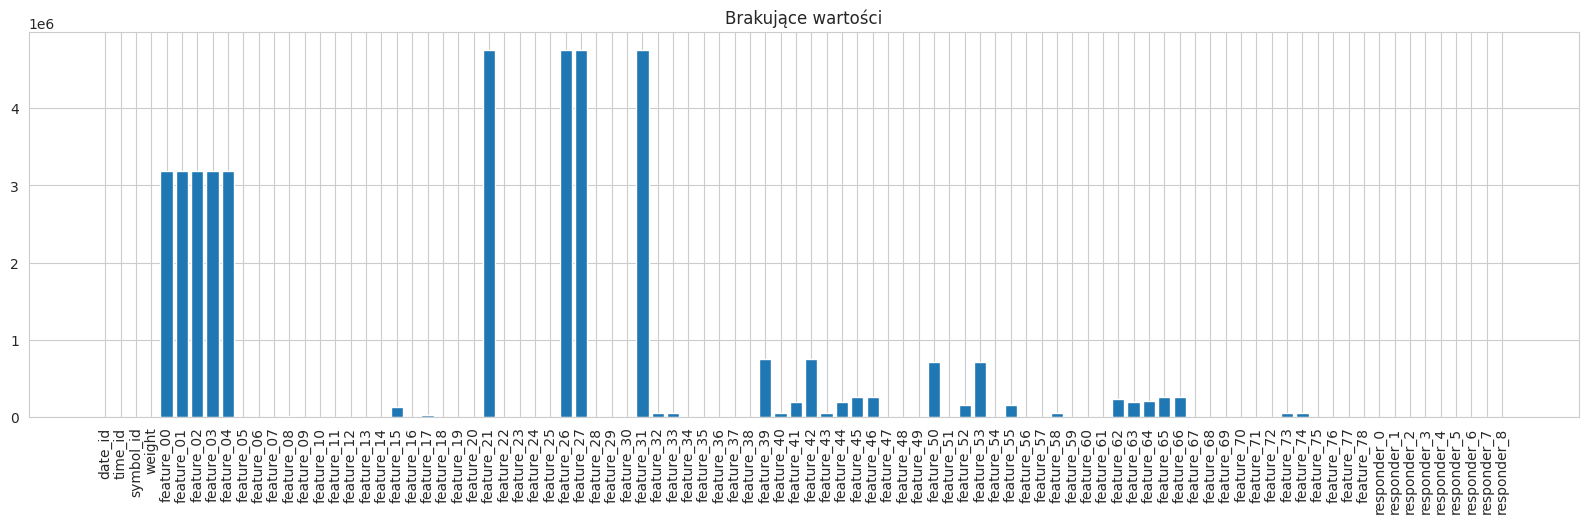

In [7]:
# Podstawowa analiza
print(sample_df.head())
print(sample_df.describe().T)

# Sprawdzenie brakujących danych
missing_values = sample_df.isna().sum()
print("Brakujące wartości:\n", missing_values[missing_values > 0])

# Wizualizacja brakujących wartości
plt.figure(figsize=(20, 5))
plt.bar(sample_df.columns, missing_values)
plt.xticks(rotation=90)
plt.title('Brakujące wartości')
plt.show()


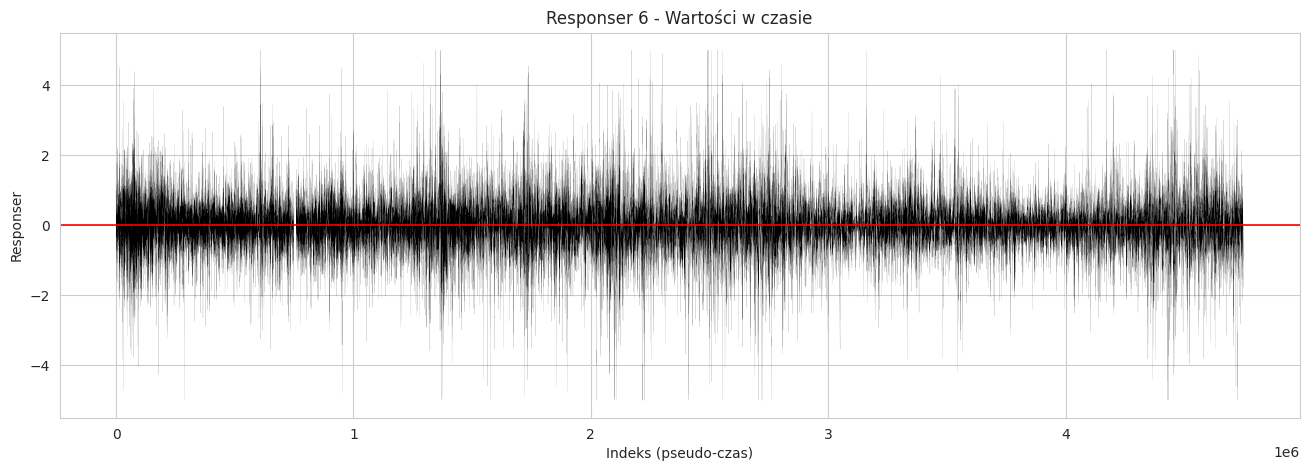

In [9]:
# Filtrowanie danych dla `symbol_id == 1`
filtered_data = sample_df[sample_df.symbol_id == 1]

# Użycie indeksu jako osi X
xx = filtered_data.index  # Indeks jako pseudo oś czasu
yy = filtered_data['responder_6']

plt.figure(figsize=(16, 5))
plt.plot(xx, yy, color='black', linewidth=0.05)
plt.title('Responser 6 - Wartości w czasie')
plt.xlabel('Indeks (pseudo-czas)')
plt.ylabel('Responser')
plt.grid(True)
plt.axhline(0, color='red', linestyle='-', linewidth=1.2)
plt.show()


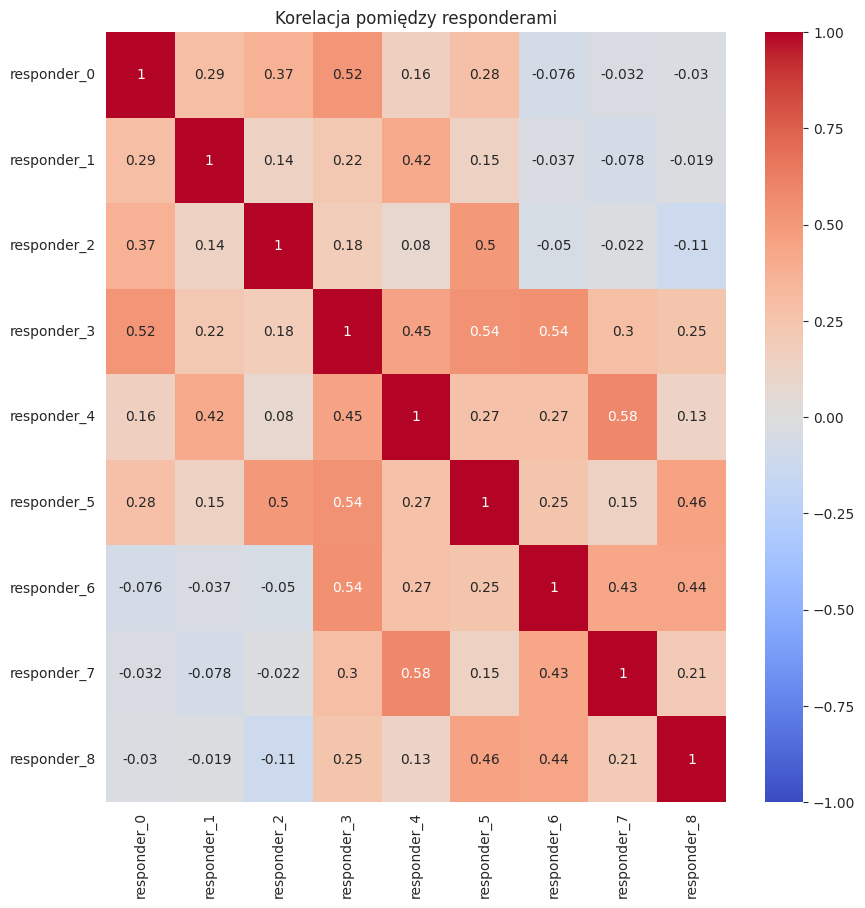

In [10]:
responders_columns = [col for col in sample_df.columns if 'responder' in col]
correlation_matrix = sample_df[responders_columns].corr()

# Heatmapa
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelacja pomiędzy responderami')
plt.show()


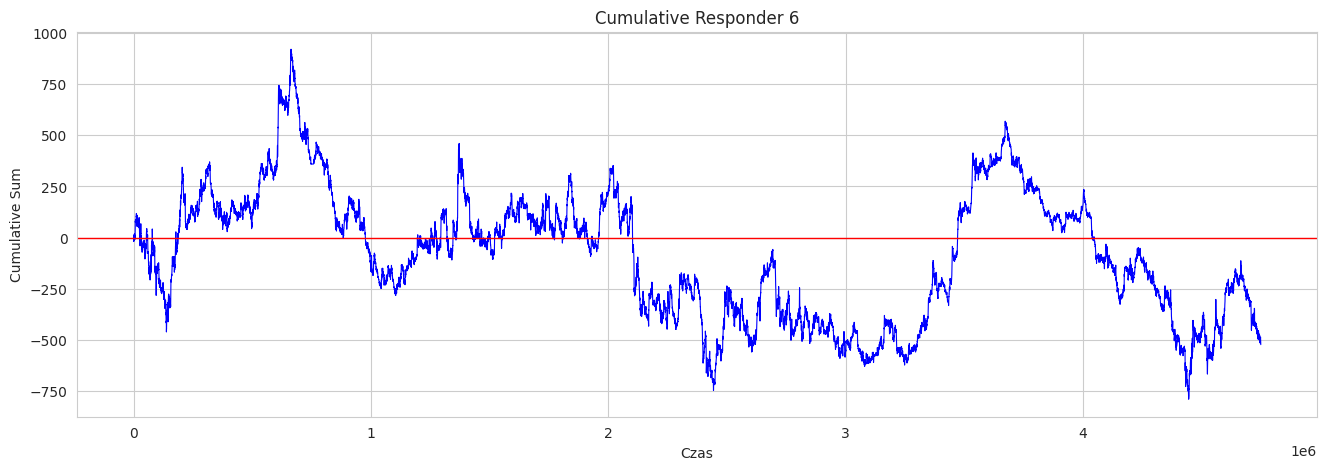

In [11]:
yy_cumsum = yy.cumsum()

plt.figure(figsize=(16, 5))
plt.plot(xx, yy_cumsum, color='blue', linewidth=0.8)
plt.title('Cumulative Responder 6')
plt.xlabel('Czas')
plt.ylabel('Cumulative Sum')
plt.axhline(0, color='red', linestyle='-', linewidth=1.0)
plt.grid(True)
plt.show()


In [12]:
from sklearn.model_selection import train_test_split

# Przygotowanie danych do modelu
target = 'responder_6'
features = [col for col in sample_df.columns if 'feature_' in col]

X = sample_df[features].fillna(0)  # Uzupełnienie brakujących wartości
y = sample_df[target].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (3798765, 79), Test shape: (949692, 79)


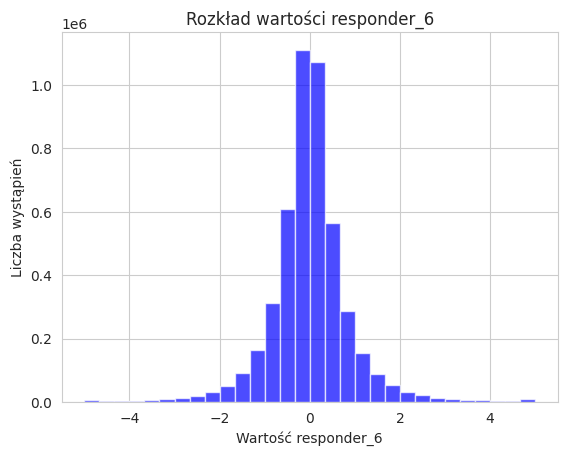

In [13]:
plt.hist(sample_df['responder_6'], bins=30, color='blue', alpha=0.7)
plt.title('Rozkład wartości responder_6')
plt.xlabel('Wartość responder_6')
plt.ylabel('Liczba wystąpień')
plt.grid(True)
plt.show()


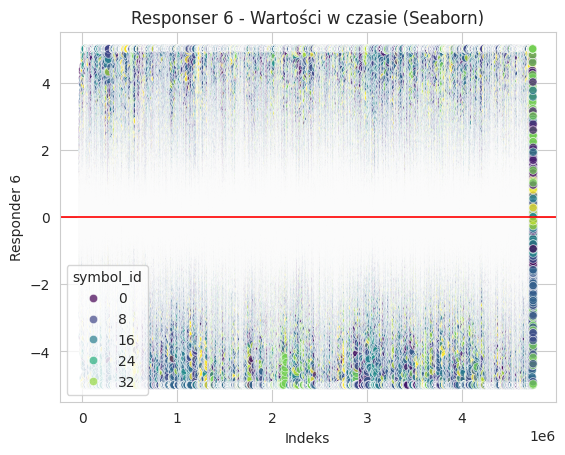

In [15]:
import seaborn as sns

sns.scatterplot(data=sample_df, x=sample_df.index, y='responder_6', hue='symbol_id', palette='viridis', alpha=0.7)
plt.title('Responser 6 - Wartości w czasie (Seaborn)')
plt.xlabel('Indeks')
plt.ylabel('Responder 6')
plt.axhline(0, color='red', linestyle='-', linewidth=1.2)
plt.grid(True)
plt.show()
